In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [57]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [34]:
df_d = pd.read_csv('1,2,3월_2.csv')

In [35]:
df_j = pd.read_csv('1,2,3월_전북전남.csv')

In [36]:
df_d["연령대"] = df_d["연령대"].str.rstrip("s").astype("int")

In [37]:
df_j['연령대'] = df_j['연령대'].str.rstrip('s').astype('int')

In [38]:
df_d.head()

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,598167,201901,카페,20,2,1,3,24890,3
1,598168,201901,카페,20,2,1,3,17800,3
2,598169,201901,카페,30,2,2,3,28500,4
3,598170,201901,카페,20,1,1,3,27900,4
4,598171,201901,카페,40,1,3,3,20600,3


In [39]:
df_j.head()

,Unnamed: 0,년월,사용지_시도,업종명,연령대,성별,생애주기,고객수,금액,건수
0,1402924,201901,전북,카페,40,2,3,3,13800,3
1,1402925,201901,전북,카페,40,1,3,3,14300,3
2,1402926,201901,전북,카페,40,1,3,3,17490,3
3,1402927,201901,전북,카페,40,1,3,5,34900,5
4,1402928,201901,전북,카페,50,1,4,3,13300,3


In [40]:
df_d['사용지_시도']='대구경북'
df_d.head()

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수,사용지_시도
0,598167,201901,카페,20,2,1,3,24890,3,대구경북
1,598168,201901,카페,20,2,1,3,17800,3,대구경북
2,598169,201901,카페,30,2,2,3,28500,4,대구경북
3,598170,201901,카페,20,1,1,3,27900,4,대구경북
4,598171,201901,카페,40,1,3,3,20600,3,대구경북


In [41]:
df_j=df_j.replace({'전남':'전북전남',"전북" : "전북전남"})

In [42]:
df_dj=pd.concat([df_d, df_j])

In [63]:
df_d["Log10_금액"] = np.log10(df_d["금액"])
df_d.head()

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수,사용지_시도,Log10_금액
0,598167,201901,카페,20,2,1,3,24890,3,대구경북,4.396025
1,598168,201901,카페,20,2,1,3,17800,3,대구경북,4.250420
2,598169,201901,카페,30,2,2,3,28500,4,대구경북,4.454845
3,598170,201901,카페,20,1,1,3,27900,4,대구경북,4.445604
4,598171,201901,카페,40,1,3,3,20600,3,대구경북,4.313867


In [64]:
df_j["Log10_금액"] = np.log10(df_j["금액"])
df_j.head()

,Unnamed: 0,년월,사용지_시도,업종명,연령대,성별,생애주기,고객수,금액,건수,Log10_금액
0,1402924,201901,전북전남,카페,40,2,3,3,13800,3,4.139879
1,1402925,201901,전북전남,카페,40,1,3,3,14300,3,4.155336
2,1402926,201901,전북전남,카페,40,1,3,3,17490,3,4.242790
3,1402927,201901,전북전남,카페,40,1,3,5,34900,5,4.542825
4,1402928,201901,전북전남,카페,50,1,4,3,13300,3,4.123852


In [43]:
#전북 전남,대구 경북의 금액을 log10으로 변환
df_dj["Log10_금액"] = np.log10(df_dj["금액"])
df_dj.head()

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수,사용지_시도,Log10_금액
0,598167,201901,카페,20,2,1,3,24890,3,대구경북,4.396025
1,598168,201901,카페,20,2,1,3,17800,3,대구경북,4.250420
2,598169,201901,카페,30,2,2,3,28500,4,대구경북,4.454845
3,598170,201901,카페,20,1,1,3,27900,4,대구경북,4.445604
4,598171,201901,카페,40,1,3,3,20600,3,대구경북,4.313867


In [14]:
#condition = df_dj[(df_dj['Log10_금액']>=8)].index
#df_dj.drop(condition, inplace=True)
#df_dj

In [15]:
#df_dj.to_csv('전북전남_대구경북_9이상 삭제.csv', encoding='euc-kr')

In [44]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224540 entries, 0 to 224539
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  224540 non-null  int64 
 1   년월          224540 non-null  int64 
 2   업종명         224540 non-null  object
 3   연령대         224540 non-null  int32 
 4   성별          224540 non-null  int64 
 5   생애주기        224540 non-null  int64 
 6   고객수         224540 non-null  int64 
 7   금액          224540 non-null  int64 
 8   건수          224540 non-null  int64 
 9   사용지_시도      224540 non-null  object
dtypes: int32(1), int64(7), object(2)
memory usage: 16.3+ MB


In [48]:
df_dj_sub = df_dj.groupby(['년월','업종명','사용지_시도'])['Log10_금액'].sum().reset_index()
df_dj_sub

,년월,업종명,사용지_시도,Log10_금액
0,201901,관광업,대구경북,6667.951637
1,201901,관광업,전북전남,8692.916704
2,201901,스포츠 및 레크레이션 용품 임대업,대구경북,11562.878671
3,201901,스포츠 및 레크레이션 용품 임대업,전북전남,9227.136338
4,201901,일반 음식점업,대구경북,166923.064233
5,201901,일반 음식점업,전북전남,120966.186450
6,201901,전시 및 행사 대행업,대구경북,6044.567561
7,201901,전시 및 행사 대행업,전북전남,10633.203290
8,201901,카페,대구경북,31730.561541
9,201901,카페,전북전남,22583.271515


In [17]:
df_d_1901=df_d[df_d['년월']==201901]
df_d_1902=df_d[df_d['년월']==201902]
df_d_1903=df_d[df_d['년월']==201903]
df_d_2001=df_d[df_d['년월']==202001]
df_d_2002=df_d[df_d['년월']==202002]
df_d_2003=df_d[df_d['년월']==202003]

df_j_1901=df_j[df_j['년월']==201901]
df_j_1902=df_j[df_j['년월']==201902]
df_j_1903=df_j[df_j['년월']==201903]
df_j_2001=df_j[df_j['년월']==202001]
df_j_2002=df_j[df_j['년월']==202002]
df_j_2003=df_j[df_j['년월']==202003]

# Log10_금액의 평균차이

In [81]:
df_d_1=df_d['Log10_금액']
df_j_1=df_j['Log10_금액']

df_d_1=np.array(df_d_1)
df_j_1=np.array(df_j_1)

In [82]:
stats.levene(df_d_1, df_j_1)

LeveneResult(statistic=211.49133219397325, pvalue=6.674510713672202e-48)

### p-value> 0.05 이므로 귀무가설 채택 => 등분산 => equal_val=True 사용

In [83]:
stats.ttest_ind(df_d_1, df_j_1, equal_var=True)

Ttest_indResult(statistic=12.256918319969053, pvalue=1.5641398986020722e-34)

### p-value>0.05 이므로 귀무가설 채택 => 대구경북, 전북전남의 Log10_금액의 평균의 차이가 없다

# 연령대 평균차이

In [84]:
df_d_2=df_d['연령대']
df_j_2=df_j['연령대']

df_d_2=np.array(df_d_2)
df_j_2=np.array(df_j_2)

In [85]:
stats.levene(df_d_2, df_j_2)

LeveneResult(statistic=473.86844388111973, pvalue=5.289994151934515e-105)

### p-value>0.05 이므로 귀무가설 채택 => 등분산 => equal_val=True 사용

In [86]:
stats.ttest_ind(df_d_2, df_j_2, equal_var=True)

Ttest_indResult(statistic=-22.332131914004638, pvalue=2.0962622846473208e-110)

### p-value>0.05이므로 귀무가설 채택 => 대구경북, 전북 전남의 연령대의 평균의 차이가 없다

In [68]:
df_d_1901=df_d[df_d['년월']==201901]
df_j_1901=df_j[df_j['년월']==201901]

df_d_1901_1=df_d_1901['Log10_금액']
df_j_1901_1=df_j_1901['Log10_금액']

In [69]:
df_d_1901_1=np.array(df_d_1901_1)
df_j_1901_1=np.array(df_j_1901_1)

stats.levene(df_d_1901_1, df_j_1901_1)

LeveneResult(statistic=29.48859446065634, pvalue=5.642647708771129e-08)

### p-value > 0.05 이므로 등분산! => equal_var=True 사용

In [70]:
stats.ttest_ind(df_d_1901_1, df_j_1901_1, equal_var=True)

Ttest_indResult(statistic=2.5098854138179854, pvalue=0.012079189721420965)

### p-value < 0.05 이므로 귀무가설 기각 => 대구경북과 전북전남의 Log10_금액의 평균의 차이가 있다

In [75]:
df_d_1901=df_d[df_d['년월']==201901]
df_j_1901=df_j[df_j['년월']==201901]

df_d_1901_2=df_d_1901['연령대']
df_j_1901_2=df_j_1901['연령대']
df_d_1901_2=np.array(df_d_1901_2)
df_j_1901_2=np.array(df_j_1901_2)

In [76]:
stats.levene(df_d_1901_2, df_j_1901_2)

LeveneResult(statistic=89.03442894073721, pvalue=3.98960502709857e-21)

In [77]:
stats.ttest_ind(df_d_1901_2, df_j_1901_2, equal_var=True)

Ttest_indResult(statistic=-7.336699969922786, pvalue=2.2119757842121701e-13)

In [78]:
df_d_1901=df_d[df_d['년월']==201901]
df_j_1901=df_j[df_j['년월']==201901]

df_d_1901_3=df_d_1901['생애주기']
df_j_1901_3=df_j_1901['생애주기']
df_d_1901_3=np.array(df_d_1901_3)
df_j_1901_3=np.array(df_j_1901_3)

In [79]:
stats.levene(df_d_1901_3, df_j_1901_3)

LeveneResult(statistic=90.01862847874541, pvalue=2.427408858148997e-21)

In [80]:
stats.ttest_ind(df_d_1901_3, df_j_1901_3, equal_var=True)

Ttest_indResult(statistic=-8.070530035434338, pvalue=7.105354628456364e-16)

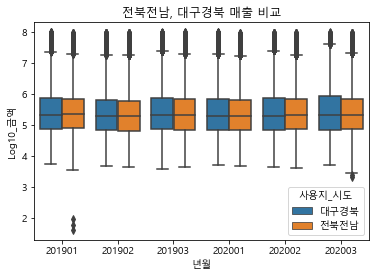

In [17]:
ax1=sns.boxplot(x="년월",y="Log10_금액",hue = "사용지_시도",data=df_dj)
ax1.set_title('전북전남, 대구경북 매출 비교')
plt.show()

In [19]:
df_d["Log10_금액"] = np.log10(df_d["금액"])
df_d

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수,사용지_시도,Log10_금액
0,598167,201901,카페,20s,2,1,3,24890,3,대구경북,4.396025
1,598168,201901,카페,20s,2,1,3,17800,3,대구경북,4.250420
2,598169,201901,카페,30s,2,2,3,28500,4,대구경북,4.454845
3,598170,201901,카페,20s,1,1,3,27900,4,대구경북,4.445604
4,598171,201901,카페,40s,1,3,3,20600,3,대구경북,4.313867
...,...,...,...,...,...,...,...,...,...,...,...
224535,23899428,202003,일반 음식점업,20s,1,1,8,904800,16,대구경북,5.956553
224536,23899429,202003,일반 음식점업,30s,1,1,3,331800,4,대구경북,5.520876
224537,23899430,202003,일반 음식점업,30s,1,2,7,1153000,28,대구경북,6.061829
224538,23899431,202003,일반 음식점업,40s,1,3,3,73000,3,대구경북,4.863323


C:\Users\LG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


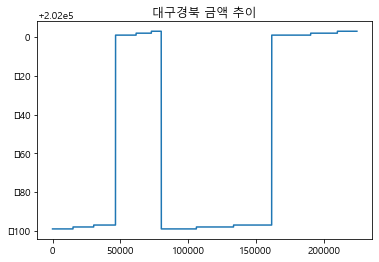

In [22]:
df_d['년월'].plot(title='대구경북 금액 추이')

In [69]:
df_d_sum = df.groupby(['년월','업종명'])['금액'].sum().reset_index()

In [70]:
df_d_sum

,년월,업종명,금액
0,201901,관광업,1015003341
1,201901,스포츠 및 레크레이션 용품 임대업,8451712722
2,201901,일반 음식점업,106065190307
3,201901,전시 및 행사 대행업,261973730
4,201901,카페,5303464897
5,201902,관광업,865742386
6,201902,스포츠 및 레크레이션 용품 임대업,7997311381
7,201902,일반 음식점업,95930590982
8,201902,전시 및 행사 대행업,378310665
9,201902,카페,5196569341


In [71]:
df_j_sum = df_1.groupby(['년월','업종명'])['금액'].sum().reset_index()
df_j_sum

,년월,업종명,금액
0,201901,관광업,2525651556
1,201901,스포츠 및 레크레이션 용품 임대업,6717711291
2,201901,일반 음식점업,63641324735
3,201901,전시 및 행사 대행업,413373152
4,201901,카페,2837510192
5,201902,관광업,1905994814
6,201902,스포츠 및 레크레이션 용품 임대업,6531950202
7,201902,일반 음식점업,56517470270
8,201902,전시 및 행사 대행업,395606010
9,201902,카페,2815328070


In [99]:
df_d_sum_age = df.groupby(['년월','업종명','연령대'])['금액'].sum().reset_index()
df_j_sum_age = df_1.groupby(['년월','업종명','연령대'])['금액'].sum().reset_index()
df_d_sum_family = df.groupby(['년월','업종명','생애주기'])['금액'].sum().reset_index()
df_j_sum_family = df_1.groupby(['년월','업종명','생애주기'])['금액'].sum().reset_index()

In [98]:
df_d_sum_age

In [85]:
#대구경북 연령대

#log10
df_d_sum_age["Log10_금액"] = np.log10(df_d_sum_age["금액"])
df_d_sum_age

,년월,업종명,연령대,금액,Log10_금액
0,201901,관광업,20,17796550,7.250336
1,201901,관광업,30,157029769,8.195982
2,201901,관광업,40,247441342,8.393472
3,201901,관광업,50,335103070,8.525178
4,201901,관광업,60,222417010,8.347168
...,...,...,...,...,...
198,202003,카페,30,856817040,8.932888
199,202003,카페,40,755860701,8.878442
200,202003,카페,50,601892671,8.779519
201,202003,카페,60,149234175,8.173868


In [89]:
#대구경북 생애주기

#log10
df_d_sum_family["Log10_금액"] = np.log10(df_d_sum_family["금액"])
df_d_sum_family

,년월,업종명,생애주기,금액,Log10_금액
0,201901,관광업,1,15585250,7.192714
1,201901,관광업,2,168023954,8.225371
2,201901,관광업,3,221391645,8.345161
3,201901,관광업,4,352369882,8.546999
4,201901,관광업,5,257632610,8.411001
...,...,...,...,...,...
145,202003,카페,1,1077865008,9.032564
146,202003,카페,2,939800964,8.973036
147,202003,카페,3,623688332,8.794968
148,202003,카페,4,692702680,8.840547


In [88]:
#전북전남 연령대

#log10
df_j_sum_age["Log10_금액"] = np.log10(df_j_sum_age["금액"])
df_j_sum_age

,년월,업종명,연령대,금액,Log10_금액
0,201901,관광업,20,435844899,8.639332
1,201901,관광업,30,621285055,8.793291
2,201901,관광업,40,590095455,8.770922
3,201901,관광업,50,606417763,8.782772
4,201901,관광업,60,259928124,8.414853
...,...,...,...,...,...
202,202003,카페,30,723519064,8.859450
203,202003,카페,40,733084740,8.865154
204,202003,카페,50,572715968,8.757939
205,202003,카페,60,154351901,8.188512


In [90]:
#전북전남 생애주기

#log10
df_j_sum_family["Log10_금액"] = np.log10(df_j_sum_family["금액"])
df_j_sum_family

,년월,업종명,생애주기,금액,Log10_금액
0,201901,관광업,1,426673303,8.630095
1,201901,관광업,2,681506127,8.833470
2,201901,관광업,3,501871261,8.700592
3,201901,관광업,4,643592481,8.808611
4,201901,관광업,5,272008384,8.434582
...,...,...,...,...,...
145,202003,카페,1,811302093,8.909183
146,202003,카페,2,834345691,8.921346
147,202003,카페,3,553305825,8.742965
148,202003,카페,4,698847649,8.844383


In [103]:
#log10
df["Log10_금액"] = np.log10(df["금액"])
df

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수,Log10_금액
0,598167,201901,카페,20,2,1,3,24890,3,4.396025
1,598168,201901,카페,20,2,1,3,17800,3,4.250420
2,598169,201901,카페,30,2,2,3,28500,4,4.454845
3,598170,201901,카페,20,1,1,3,27900,4,4.445604
4,598171,201901,카페,40,1,3,3,20600,3,4.313867
...,...,...,...,...,...,...,...,...,...,...
224535,23899428,202003,일반 음식점업,20,1,1,8,904800,16,5.956553
224536,23899429,202003,일반 음식점업,30,1,1,3,331800,4,5.520876
224537,23899430,202003,일반 음식점업,30,1,2,7,1153000,28,6.061829
224538,23899431,202003,일반 음식점업,40,1,3,3,73000,3,4.863323


In [102]:
#log10
df_1["Log10_금액"] = np.log10(df_1["금액"])
df_1

,Unnamed: 0,년월,사용지_시도,업종명,연령대,성별,생애주기,고객수,금액,건수,Log10_금액
0,1402924,201901,전북,카페,40,2,3,3,13800,3,4.139879
1,1402925,201901,전북,카페,40,1,3,3,14300,3,4.155336
2,1402926,201901,전북,카페,40,1,3,3,17490,3,4.242790
3,1402927,201901,전북,카페,40,1,3,5,34900,5,4.542825
4,1402928,201901,전북,카페,50,1,4,3,13300,3,4.123852
...,...,...,...,...,...,...,...,...,...,...,...
186755,24538819,202003,전남,일반 음식점업,60,2,5,242,10799645,312,7.033409
186756,24538820,202003,전남,일반 음식점업,70,1,5,176,8602400,294,6.934620
186757,24538821,202003,전남,일반 음식점업,70,2,5,39,1431000,46,6.155640
186758,24538822,202003,전남,일반 음식점업,50,1,4,4,75900,7,4.880242


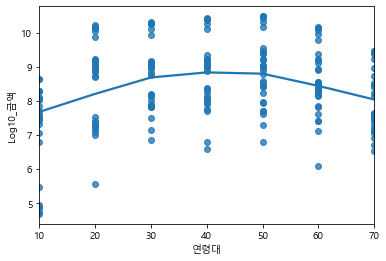

In [86]:
sns.regplot('연령대','Log10_금액',lowess=True, data = df_d_sum_age)

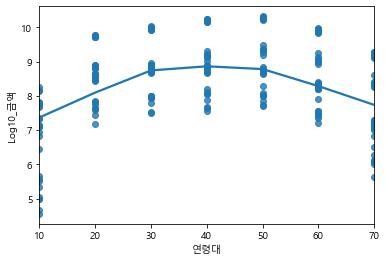

In [91]:
sns.regplot('연령대', 'Log10_금액', lowess=True, data=df_j_sum_age)

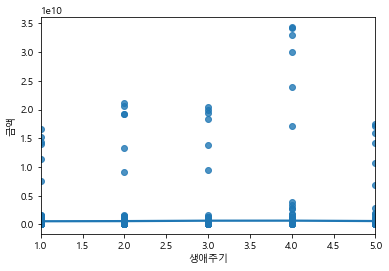

In [77]:
sns.regplot('생애주기','금액',lowess=True, data = df_d_sum_family)

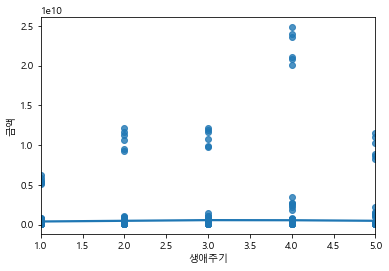

In [78]:
sns.regplot('생애주기','금액',lowess=True, data = df_j_sum_family)

,Unnamed: 0,년월,업종명,금액
0,0,201901,관광업,1.015003e+09
1,1,201901,대중교통,2.823000e+06
2,2,201901,스포츠 및 레크레이션 용품 임대업,8.451713e+09
3,3,201901,일반 음식점업,1.060650e+11
4,4,201901,전시 및 행사 대행업,2.619737e+08


In [9]:
import seaborn as sns

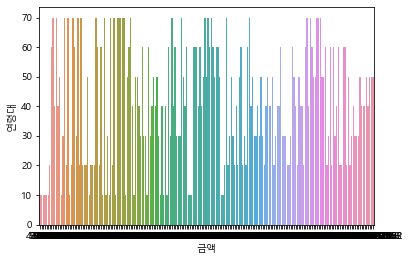

In [79]:
sns.barplot(x='금액', y='연령대', data=df_d_sum_age,ci='sd')

In [10]:
import matplotlib.pyplot as plt

In [11]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0.5, 1.0, '전북 전남 금액')

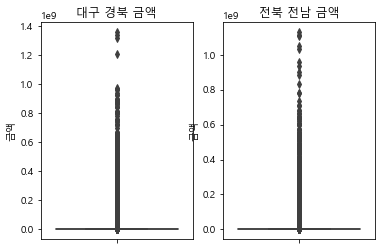

In [101]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot('금액', data=df, ax=ax1, orient='v')
ax1.set_title('대구 경북 금액')

sns.boxplot('금액', data=df_1, ax=ax2, orient='v')
ax2.set_title('전북 전남 금액')

## Log10 으로 변환 후 사용

Text(0.5, 1.0, '전북 전남 금액(log10)')

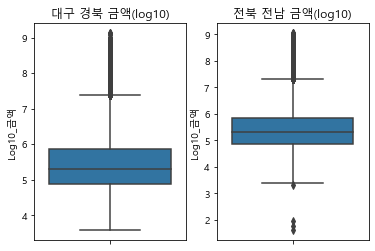

In [104]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot('Log10_금액', data=df, ax=ax1, orient='v')
ax1.set_title('대구 경북 금액(log10)')

sns.boxplot('Log10_금액', data=df_1, ax=ax2, orient='v')
ax2.set_title('전북 전남 금액(log10)')

Text(0.5, 1.0, '전북 전남 생애주기 별 금액')

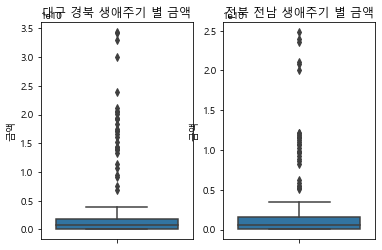

In [94]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot('금액', data=df_d_sum_family, ax=ax1, orient='v')
ax1.set_title('대구 경북 생애주기 별 금액')

sns.boxplot('금액', data=df_j_sum_family, ax=ax2, orient='v')
ax2.set_title('전북 전남 생애주기 별 금액')

Text(0.5, 1.0, '전북 전남 연령대 별 금액')

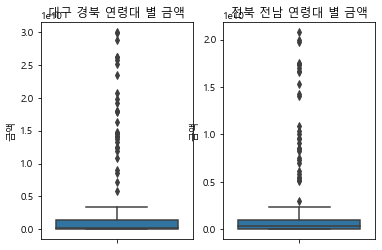

In [95]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot('금액', data=df_d_sum_age, ax=ax1, orient='v')
ax1.set_title('대구 경북 연령대 별 금액')

sns.boxplot('금액', data=df_j_sum_age, ax=ax2, orient='v')
ax2.set_title('전북 전남 연령대 별 금액')

## 금액을 Log 10 으로 변환하여 사용

Text(0.5, 1.0, '전북 전남 생애주기 별 금액')

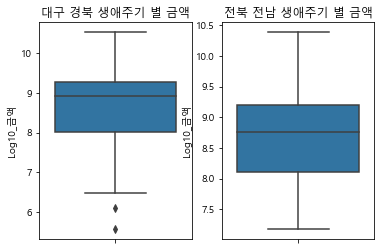

In [92]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot('Log10_금액', data=df_d_sum_family, ax=ax1, orient='v')
ax1.set_title('대구 경북 생애주기 별 금액')

sns.boxplot('Log10_금액', data=df_j_sum_family, ax=ax2, orient='v')
ax2.set_title('전북 전남 생애주기 별 금액')

Text(0.5, 1.0, '전북 전남 연령대 별 금액')

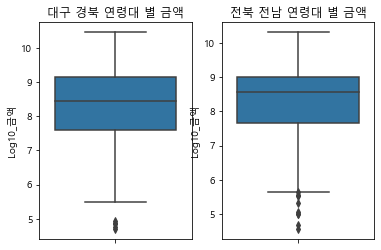

In [93]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot('Log10_금액', data=df_d_sum_age, ax=ax1, orient='v')
ax1.set_title('대구 경북 연령대 별 금액')

sns.boxplot('Log10_금액', data=df_j_sum_age, ax=ax2, orient='v')
ax2.set_title('전북 전남 연령대 별 금액')

Text(0.5, 1.0, '생애주기')

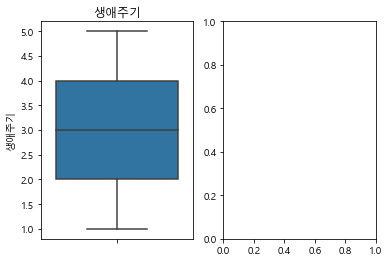

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot('생애주기', data=df, ax=ax1, orient='v')
ax1.set_title('생애주기')

Text(0.5, 1.0, '금액')

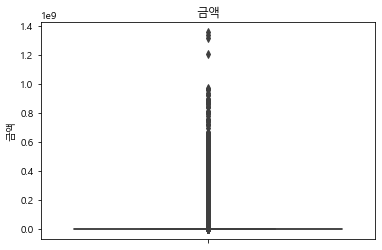

In [105]:
fig, ax1 = plt.subplots(1,1)

sns.boxplot('금액', data=df, ax=ax1, orient='v')
ax1.set_title('금액')

In [ ]:

fig, (ax1, ax2) = plt.subplots(1,2)

sns.kdeplot(df_1['금액'], ax=ax1)
ax1.set_title('금액')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.kdeplot(df['금액'], ax=ax1)
ax1.set_title('금액')

C:\Users\LG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


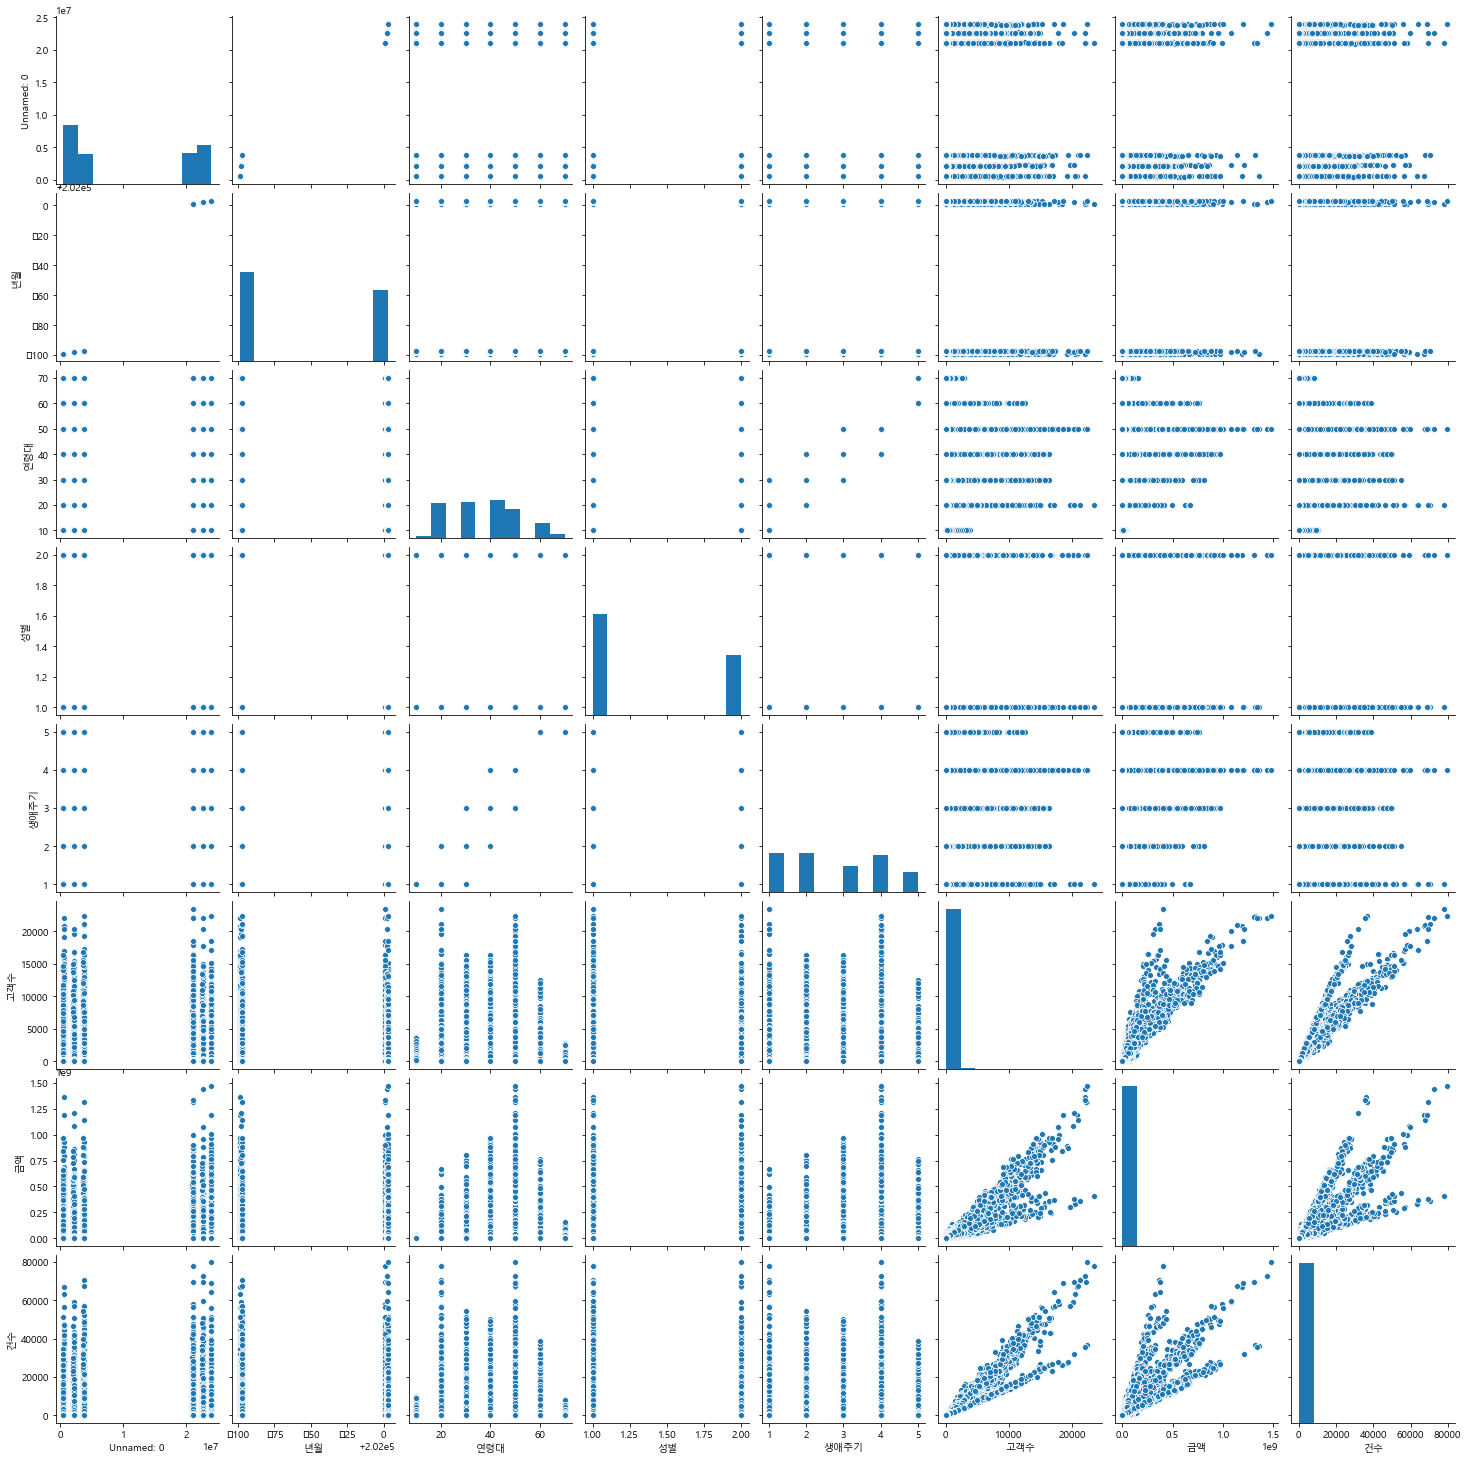

In [14]:
sns.pairplot(data=df, diag_kind='hist')

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('1,2,3월_2.csv')
df

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,598167,201901,카페,20s,2,1,3,24890,3
1,598168,201901,카페,20s,2,1,3,17800,3
2,598169,201901,카페,30s,2,2,3,28500,4
3,598170,201901,카페,20s,1,1,3,27900,4
4,598171,201901,카페,40s,1,3,3,20600,3
...,...,...,...,...,...,...,...,...,...
224535,23899428,202003,일반 음식점업,20s,1,1,8,904800,16
224536,23899429,202003,일반 음식점업,30s,1,1,3,331800,4
224537,23899430,202003,일반 음식점업,30s,1,2,7,1153000,28
224538,23899431,202003,일반 음식점업,40s,1,3,3,73000,3


C:\Users\LG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


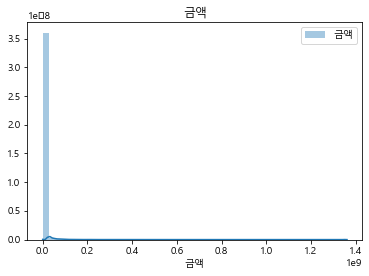

In [18]:
sns.distplot(df["금액"],label="금액")
plt.title('금액')
#각 선에 라벨링 표기
plt.legend()
plt.show()

In [32]:
#log10
df["Log10_금액"] = np.log10(df["금액"])
#logn
df["Logn_금액"] = np.log(df["금액"])
#log2
df["Log2_금액"] = np.log2(df["금액"])

df

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수,Log_금액,Log10_금액,Logn_금액,Log2_금액
0,598167,201901,카페,20s,2,1,3,24890,3,4.396025,4.396025,10.122221,14.603279
1,598168,201901,카페,20s,2,1,3,17800,3,4.250420,4.250420,9.786954,14.119590
2,598169,201901,카페,30s,2,2,3,28500,4,4.454845,4.454845,10.257659,14.798674
3,598170,201901,카페,20s,1,1,3,27900,4,4.445604,4.445604,10.236382,14.767978
4,598171,201901,카페,40s,1,3,3,20600,3,4.313867,4.313867,9.933046,14.330357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224535,23899428,202003,일반 음식점업,20s,1,1,8,904800,16,5.956553,5.956553,13.715469,19.787239
224536,23899429,202003,일반 음식점업,30s,1,1,3,331800,4,5.520876,5.520876,12.712288,18.339954
224537,23899430,202003,일반 음식점업,30s,1,2,7,1153000,28,6.061829,6.061829,13.957878,20.136961
224538,23899431,202003,일반 음식점업,40s,1,3,3,73000,3,4.863323,4.863323,11.198215,16.155609


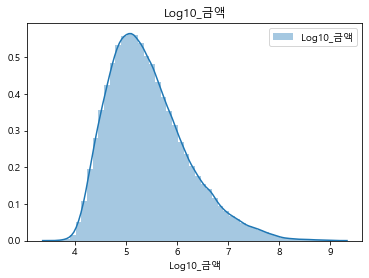

In [33]:
sns.distplot(df['Log10_금액'], label="Log10_금액")
plt.title('Log10_금액')

plt.legend()
plt.show()

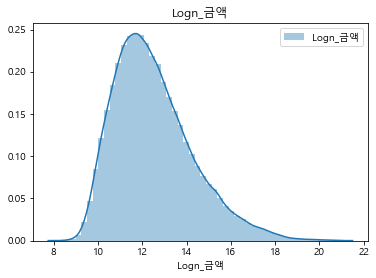

In [34]:
sns.distplot(df['Logn_금액'], label="Logn_금액")
plt.title('Logn_금액')

plt.legend()
plt.show()

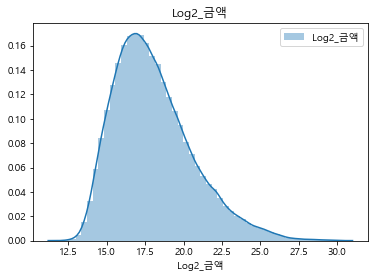

In [35]:
sns.distplot(df['Log2_금액'], label="Log2_금액")
plt.title('Log2_금액')

plt.legend()
plt.show()

Text(0.5, 1.0, 'Log10_금액')

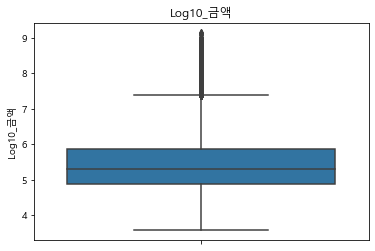

In [36]:
fig, ax1 = plt.subplots(1,1)

sns.boxplot('Log10_금액', data=df, ax=ax1, orient='v')
ax1.set_title('Log10_금액')